In [5]:
import talib
import yfinance as yf
from datetime import date

today = date.today().strftime("%Y-%m-%d")
stockticker = '^BSESN'
dataframe = yf.download(stockticker, start='2021-03-31', end=today)

open = dataframe['Open']
high = dataframe['High']
low = dataframe['Low']
close = dataframe['Adj Close']

threeLineStrike = talib.CDL3LINESTRIKE(open,high,low,close)
threeBlackCrow = talib.CDL3BLACKCROWS(open,high,low,close)
eveningStar = talib.CDLEVENINGSTAR(open,high,low,close)
engulfing = talib.CDLENGULFING(open,high,low,close)
dragonflyDoji = talib.CDLDRAGONFLYDOJI(open,high,low,close)
gravestoneDoji = talib.CDLGRAVESTONEDOJI(open,high,low,close)
tasukigap = talib.CDLTASUKIGAP(open,high,low,close)
hammer = talib.CDLHAMMER(open,high,low,close)
darkCloudCover = talib.CDLDARKCLOUDCOVER(open,high,low,close)
piercingLine = talib.CDLPIERCING(open,high,low,close)


dataframe['3 Line Strike'] = threeLineStrike
dataframe['3 Black Crow'] = threeBlackCrow
dataframe['Evening Star'] = eveningStar
dataframe['Engulfing'] = engulfing
dataframe['Dragonfly Doji'] = dragonflyDoji
dataframe['Gravestone Doji'] = gravestoneDoji
dataframe['Tasuki Gap'] = tasukigap
dataframe['Hammer'] = hammer
dataframe['DarkCloudCover'] = darkCloudCover
dataframe['Piercing Line'] = piercingLine


topCandles = ["3 Line Strike","3 Black Crow","Evening Star","Engulfing","Dragonfly Doji","Gravestone Doji","Tasuki Gap","Hammer","DarkCloudCover","Piercing Line"]


for x in dataframe.index:
    for cd in topCandles:
        if dataframe.loc[x, cd] == -100:
            dataframe.loc[x, cd] = "Bearish"
        if dataframe.loc[x, cd] == 100:
            dataframe.loc[x, cd] = "Bullish"

dataframe.drop('Open', axis=1, inplace=True)
dataframe.drop('High', axis=1, inplace=True)
dataframe.drop('Low', axis=1, inplace=True)
dataframe.drop('Close', axis=1, inplace=True)
dataframe.drop('Adj Close', axis=1, inplace=True)
dataframe.drop('Volume', axis=1, inplace=True)

dataframe.to_csv("dataf.csv")

ModuleNotFoundError: No module named 'talib'

In [6]:
import pandas as pd

In [14]:
# Extract projects
PROJECTS_URL = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/projects.csv"
projects = pd.read_csv(PROJECTS_URL)
projects.head(5)

,id,created_on,title,description
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla..."
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...
4,19,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...


In [15]:
TAGS_URL = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/tags.csv"
tags = pd.read_csv(TAGS_URL)
tags.head(5)

,id,tag
0,6,computer-vision
1,7,computer-vision
2,9,graph-learning
3,15,reinforcement-learning
4,19,graph-learning


In [16]:
df = pd.merge(projects, tags, on="id")
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",graph-learning
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,reinforcement-learning
4,19,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...,graph-learning


In [17]:
df.to_csv("labeled_projects.csv", index=False)

# Exploration

In [18]:

from collections import Counter
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
sns.set_theme()
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'wordcloud'

C:\Users\STSC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


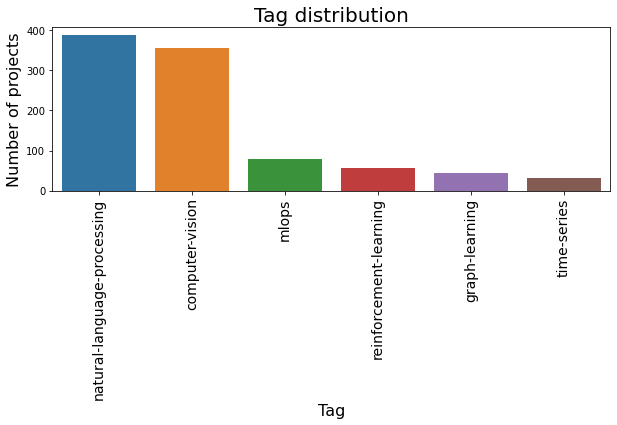

In [19]:
tags, tag_counts = zip(*Counter(df.tag.values).most_common())
plt.figure(figsize=(10, 3))
ax = sns.barplot(list(tags), list(tag_counts))
plt.title("Tag distribution", fontsize=20)
plt.xlabel("Tag", fontsize=16)
ax.set_xticklabels(tags, rotation=90, fontsize=14)
plt.ylabel("Number of projects", fontsize=16)
plt.show()

In [20]:
tags = Counter(df.tag.values)
tags.most_common()

[('natural-language-processing', 388),
 ('computer-vision', 356),
 ('mlops', 79),
 ('reinforcement-learning', 56),
 ('graph-learning', 45),
 ('time-series', 31)]

In [22]:
df.isna().sum()

id             0
created_on     0
title          0
description    0
tag            0
dtype: int64

In [23]:
import collections
from sklearn.model_selection import train_test_split

In [24]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [25]:
def train_val_test_split(X, y, train_size):
    """Split dataset into data splits."""
    X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5, stratify=y_)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [26]:
df

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",graph-learning
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,reinforcement-learning
4,19,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...,graph-learning
...,...,...,...,...,...
950,2431,2020-10-05 12:36:02,A Survey of the State of Explainable AI for NLP,Overview of the operations and explainability ...,natural-language-processing
951,2432,2020-10-05 13:09:58,Topic Modeling with BERT,Leveraging 🤗 Transformers and a class-based TF...,natural-language-processing
952,2434,2020-10-06 02:13:01,OpenMMLab Computer Vision,MMCV is a python library for CV research and s...,computer-vision
953,2436,2020-10-06 13:29:44,Machine Learning Methods Explained (+ Examples),Most common techniques used in data science pr...,reinforcement-learning


In [27]:
import numpy as np
x = np.random.random(4) # values between 0 and 1
print ("x:\n", x)
print (f"mean: {np.mean(x):.2f}, std: {np.std(x):.2f}")
x_standardized = (x - np.mean(x)) / np.std(x)
print ("x_standardized:\n", x_standardized)
print (f"mean: {np.mean(x_standardized):.2f}, std: {np.std(x_standardized):.2f}")

x:
 [0.01391696 0.25091351 0.6094134  0.89683191]
mean: 0.44, std: 0.34
x_standardized:
 [-1.2720118  -0.56905969  0.49428177  1.34678973]
mean: 0.00, std: 1.00


In [28]:
import numpy as np
x = np.random.random(4) # values between 0 and 1
print ("x:", x)
print (f"min: {x.min():.2f}, max: {x.max():.2f}")
x_scaled = (x - x.min()) / (x.max() - x.min())
print ("x_scaled:", x_scaled)
print (f"min: {x_scaled.min():.2f}, max: {x_scaled.max():.2f}")

x: [0.77985069 0.01138798 0.28319356 0.91444432]
min: 0.01, max: 0.91
x_scaled: [0.85095766 0.         0.30098408 1.        ]
min: 0.00, max: 1.00


In [29]:
import numpy as np
x = np.random.random(4) # values between 0 and 1
print ("x:", x)
bins = np.linspace(0, 1, 5) # bins between 0 and 1
print ("bins:", bins)
binned = np.digitize(x, bins)
print ("binned:", binned)

x: [0.33431578 0.84279684 0.77807157 0.56821227]
bins: [0.   0.25 0.5  0.75 1.  ]
binned: [2 4 4 3]


In [35]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()

In [36]:
label_encoder.class_to_index = {
"attention": 0,
"autoencoders": 1,
"convolutional-neural-networks": 2,
"data-augmentation": 3,
 }
label_encoder.transform(["attention", "data-augmentation"])

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['team']]).toarray())

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [38]:
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [48]:
def clean_text(text, stopwords=STOPWORDS):
    """Clean raw text."""
    # Lower
#     if lower:
#         text = text.lower()

    # Remove stopwords
#     if len(stopwords):
#         pattern = re.compile(r'\b(' + r"|".join(stopwords) + r")\b\s*")
#         text = pattern.sub('', text)

    # Spacing and filters
    text = re.sub(
        r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text
    )  # add spacing between objects to be filtered
    text = re.sub("[^A-Za-z0-9]+", " ", text)  # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()  # strip white space at the ends

    # Remove links
    text = re.sub(r"http\S+", "", text)

    # Stemming
    if stem:
        text = " ".join([stemmer.stem(word, to_lowercase=lower) for word in text.split(" ")])

    return text

In [50]:
 text = clean_text(df["title"], stopwords=STOPWORDS)

TypeError: expected string or bytes-like object

In [40]:
original_df = df.copy()
df.text = df.text.apply(clean_text, lower=True, stem=False)
print (f"{original_df.text.values[0]}\n{df.text.values[0]}")

AttributeError: 'DataFrame' object has no attribute 'text'